# Problem Statement

A certain food-based company conducted a survey with the help of a fitness company to find the relationship between a person’s weight gain and the number of calories they consumed in order to come up with diet plans for these individuals. Build a Simple Linear Regression model with calories consumed as the target variable. Apply necessary transformations and record the RMSE and correlation coefficient values for different models. 

----- #### ------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.rcParams['figure.figsize'] = (15,15)

In [2]:
data = pd.read_csv('calories_consumed.csv')
data.shape

(14, 2)

We have 14 rows and 2 columns

In [3]:
data.describe()

,Weight gained (grams),Calories Consumed
count,14.000000,14.000000
mean,357.714286,2340.714286
std,333.692495,752.109488
min,62.000000,1400.000000
25%,114.500000,1727.500000
50%,200.000000,2250.000000
75%,537.500000,2775.000000
max,1100.000000,3900.000000


In [4]:
data.columns

Index(['Weight gained (grams)', 'Calories Consumed'], dtype='object')

In [5]:
data = data.rename(columns = {'Weight gained (grams)':'Weight_gained', 'Calories Consumed':'Calories_consumed'})
data

,Weight_gained,Calories_consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500
5,110,1600
6,128,1400
7,62,1900
8,600,2800
9,1100,3900


Lets visualize our data

<AxesSubplot:xlabel='Weight_gained', ylabel='Calories_consumed'>

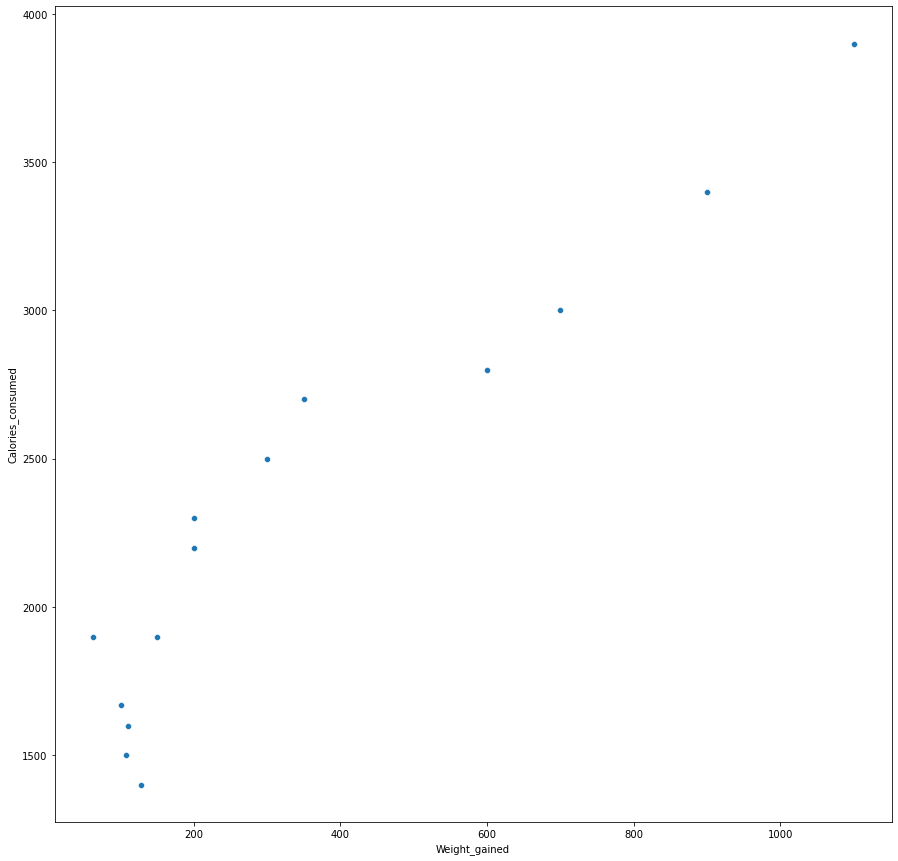

In [6]:
sns.scatterplot(x=data['Weight_gained'],y=data['Calories_consumed'])

<AxesSubplot:>

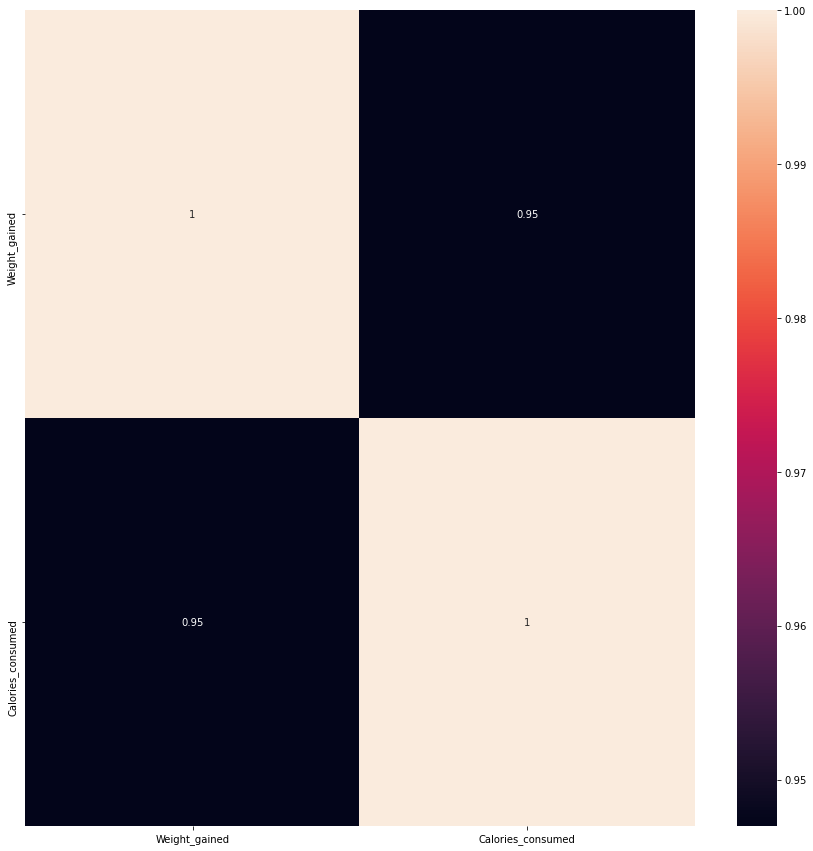

In [7]:
sns.heatmap(data.corr(), annot=True)

There is a positive correlation of 0.95 between variables

(array([[10.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  2.,  4.,  2.,  2.,  2.,  1.,  1.]]),
 array([  62. ,  445.8,  829.6, 1213.4, 1597.2, 1981. , 2364.8, 2748.6,
        3132.4, 3516.2, 3900. ]),
 <a list of 2 BarContainer objects>)

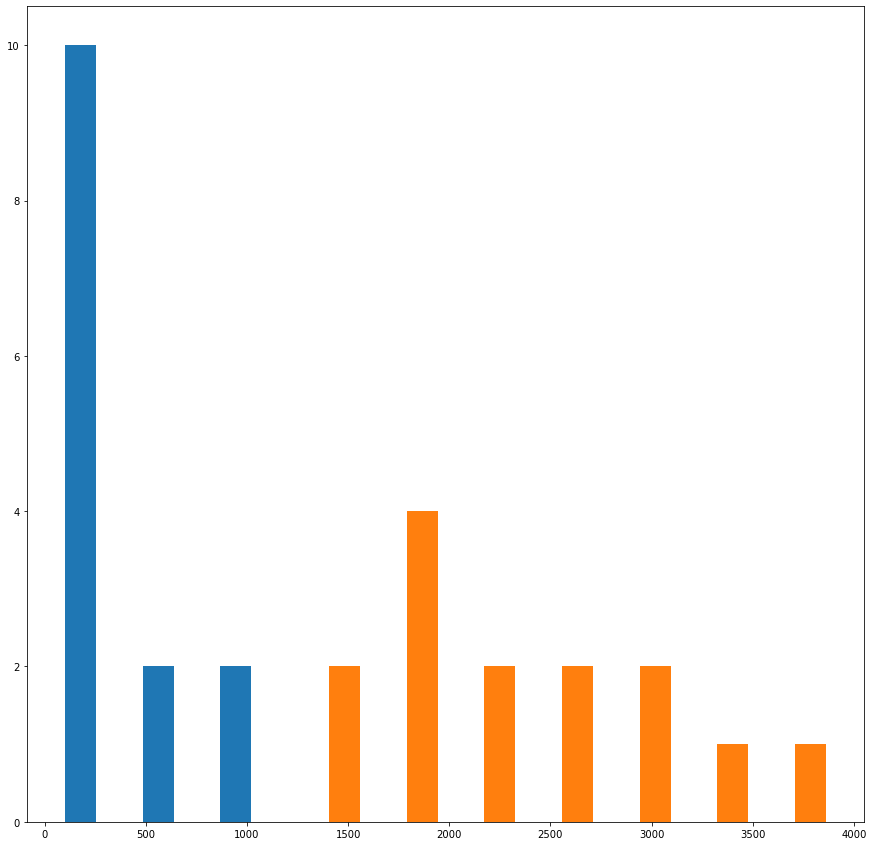

In [8]:
plt.hist(data)

{'whiskers': [<matplotlib.lines.Line2D at 0x1aa044a80a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1aa044a8760>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aa04497d00>,
 'medians': [<matplotlib.lines.Line2D at 0x1aa044a8e20>,
 'fliers': [<matplotlib.lines.Line2D at 0x1aa044b21c0>,
 'means': []}

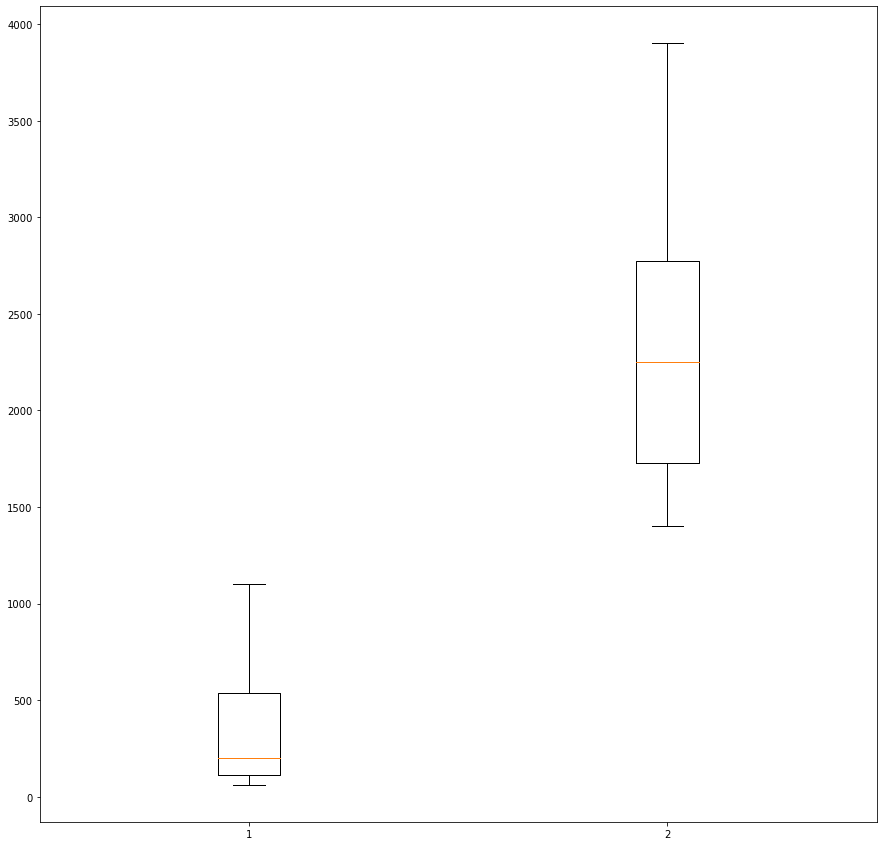

In [9]:
plt.boxplot(data)

We do not see any outlier in our data

Let's check the covariance output

In [10]:
data.cov()

,Weight_gained,Calories_consumed
Weight_gained,111350.681319,237669.450549
Calories_consumed,237669.450549,565668.681319


Lets build our model

In [11]:
import statsmodels.formula.api as smf

Simple Linear Regression

In [12]:
model1 = smf.ols('Calories_consumed ~ Weight_gained', data=data).fit()

In [13]:
model1.summary()

C:\Users\jaich\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Calories_consumed   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     104.3
Date:                Fri, 17 Sep 2021   Prob (F-statistic):           2.86e-07
Time:                        14:05:04   Log-Likelihood:                -96.170
No. Observations:                  14   AIC:                             196.3
Df Residuals:                      12   BIC:                             197.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1577.2007    100.541     15.687      0.000    1358.141    1796.260
Weight_gained     2.1344      0.209     10.211      0.000       1.679       2.590
==============================================================================
Omnibus:                        0.254   Durbin-Watson:                   2.308
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.425
Skew:                          -0.098   Prob(JB):                        0.808
Kurtosis:                       2.169   Cond. No.                         719.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
pred1 = model1.predict(pd.DataFrame(data['Weight_gained']))
pred1

0     1807.718381
1     2004.085294
2     3498.181364
3     2004.085294
4     2217.527589
5     1811.987227
6     1850.406841
7     1709.534925
8     2857.854477
9     3925.065955
10    1790.642998
11    1897.364146
12    2324.248737
13    3071.296772
dtype: float64

Lets look at the regression line

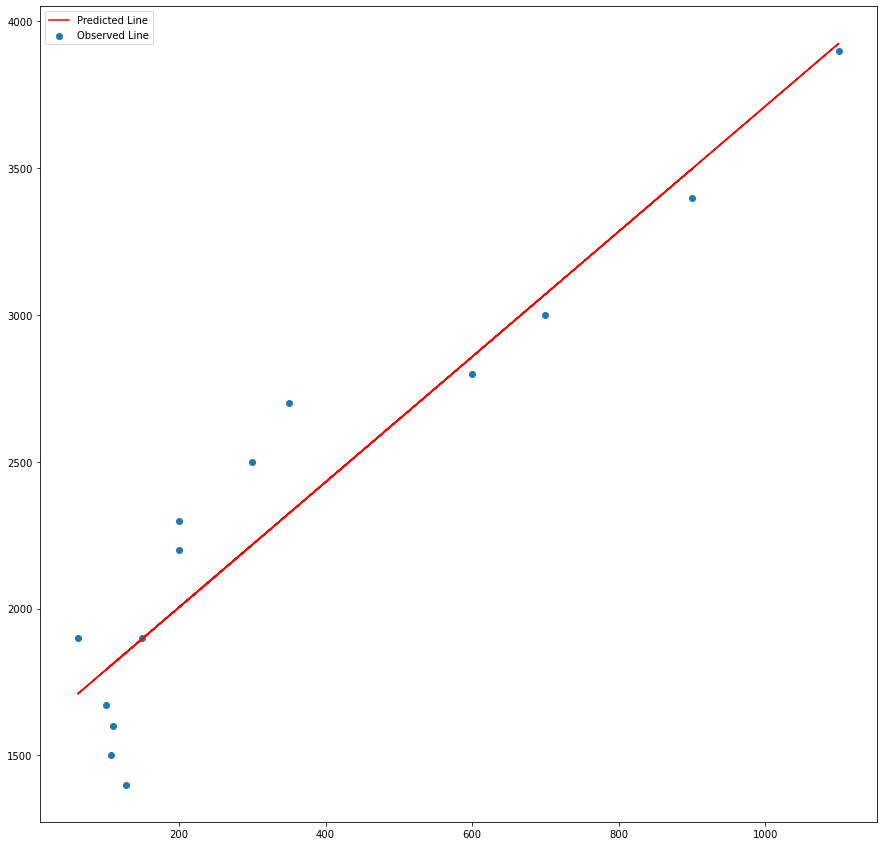

In [15]:
plt.scatter(data['Weight_gained'],data['Calories_consumed'])
plt.plot(data['Weight_gained'], pred1,"r")
plt.legend(['Predicted Line', 'Observed Line'])
plt.show()

Lets calculate RMSE score

In [16]:
res1 = data['Calories_consumed'] - pred1
res_sqrt1 = res1 * res1
mse1 = np.mean(res_sqrt1)
rmse = np.sqrt(mse1)
rmse

232.8335007096088

## Log Transformation

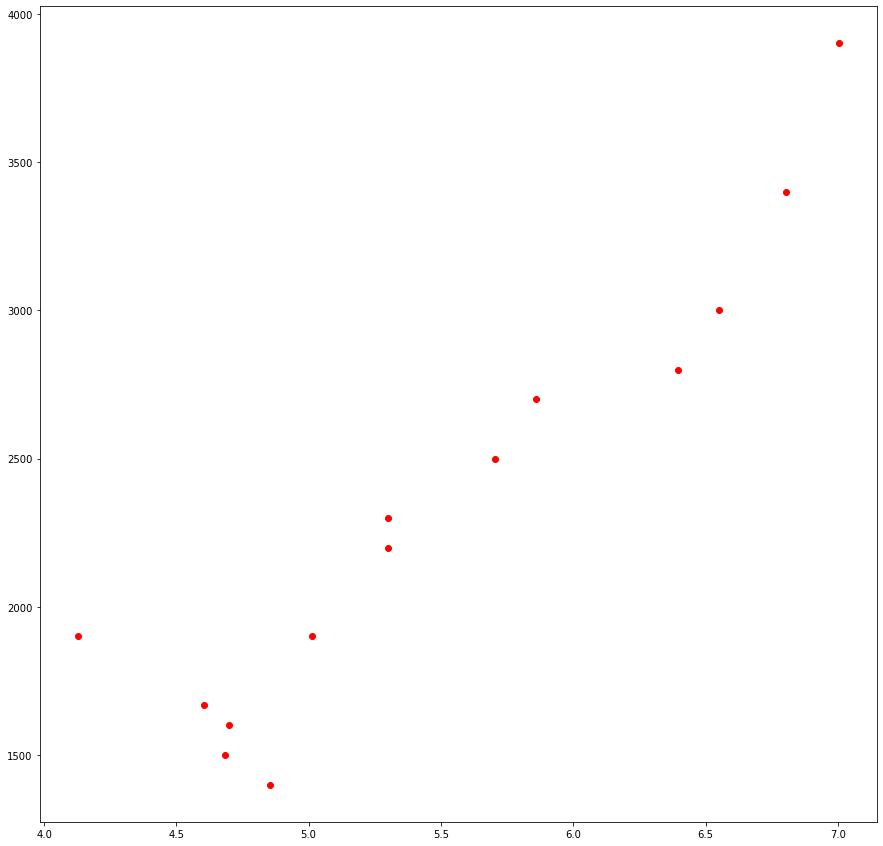

In [17]:
plt.scatter(x=np.log(data['Weight_gained']), y=data['Calories_consumed'], color='red')

In [18]:
np.corrcoef(np.log(data['Weight_gained']), data['Calories_consumed'])

array([[1.        , 0.93680369],
       [0.93680369, 1.        ]])

In [19]:
model2 = smf.ols('Calories_consumed ~ np.log(Weight_gained)', data=data).fit()
model2.summary()

C:\Users\jaich\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Calories_consumed   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     86.04
Date:                Fri, 17 Sep 2021   Prob (F-statistic):           8.02e-07
Time:                        14:05:06   Log-Likelihood:                -97.363
No. Observations:                  14   AIC:                             198.7
Df Residuals:                      12   BIC:                             200.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -1911.1244    464.188     -4.117      0.001   -2922.503    -899.746
np.log(Weight_gained)   774.1735     83.462      9.276      0.000     592.326     956.021
==============================================================================
Omnibus:                        4.026   Durbin-Watson:                   3.009
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                1.659
Skew:                           0.772   Prob(JB):                        0.436
Kurtosis:                       3.679   Cond. No.                         36.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
pred2 = model2.predict(pd.DataFrame(data['Weight_gained']))

Regression Line

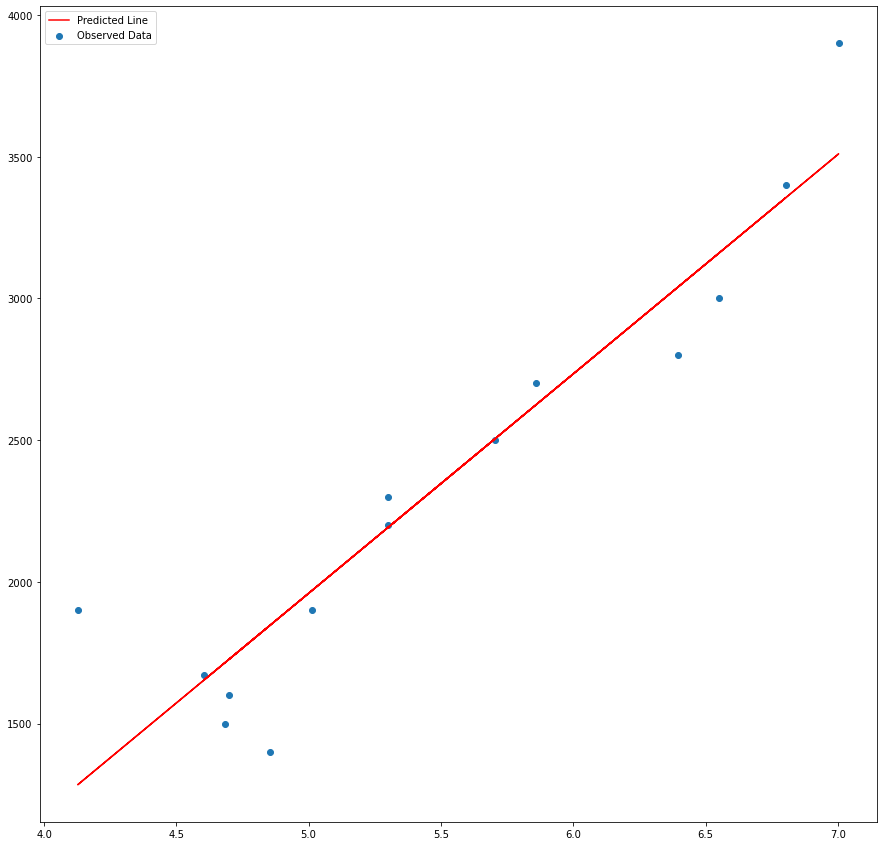

In [21]:
plt.scatter(np.log(data['Weight_gained']),data['Calories_consumed'])
plt.plot(np.log(data['Weight_gained']), pred2, "r")
plt.legend(['Predicted Line', 'Observed Data'])
plt.show()

Other way of showing

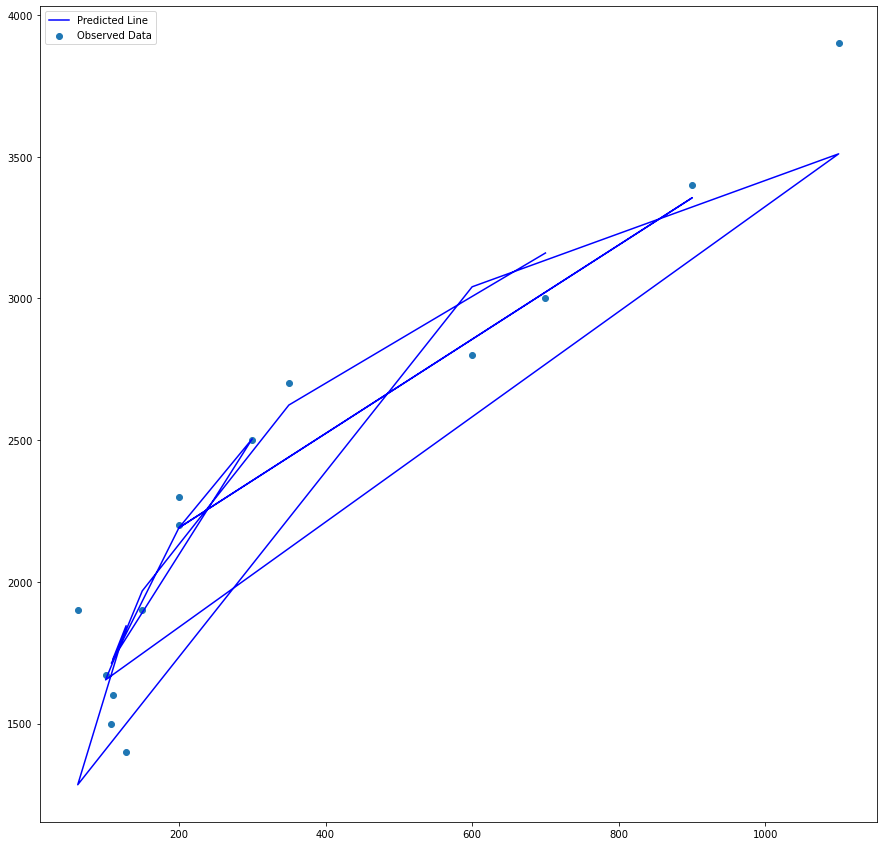

In [22]:
plt.scatter(data['Weight_gained'], data['Calories_consumed'])
plt.plot(data['Weight_gained'], pred2, "b")
plt.legend(['Predicted Line', 'Observed Data'])
plt.show()

Error Calculation

In [23]:
res2 = data['Calories_consumed'] - pred2
res_sqrt2 = res2 * res2
mse2 = np.mean(res_sqrt2)
rmse2 = np.sqrt(mse2)
rmse2

253.5580403936626

# Expontential Transformation

x = Weight gained, y = log(Calories Consumed)

array([[1.        , 0.89872528],
       [0.89872528, 1.        ]])

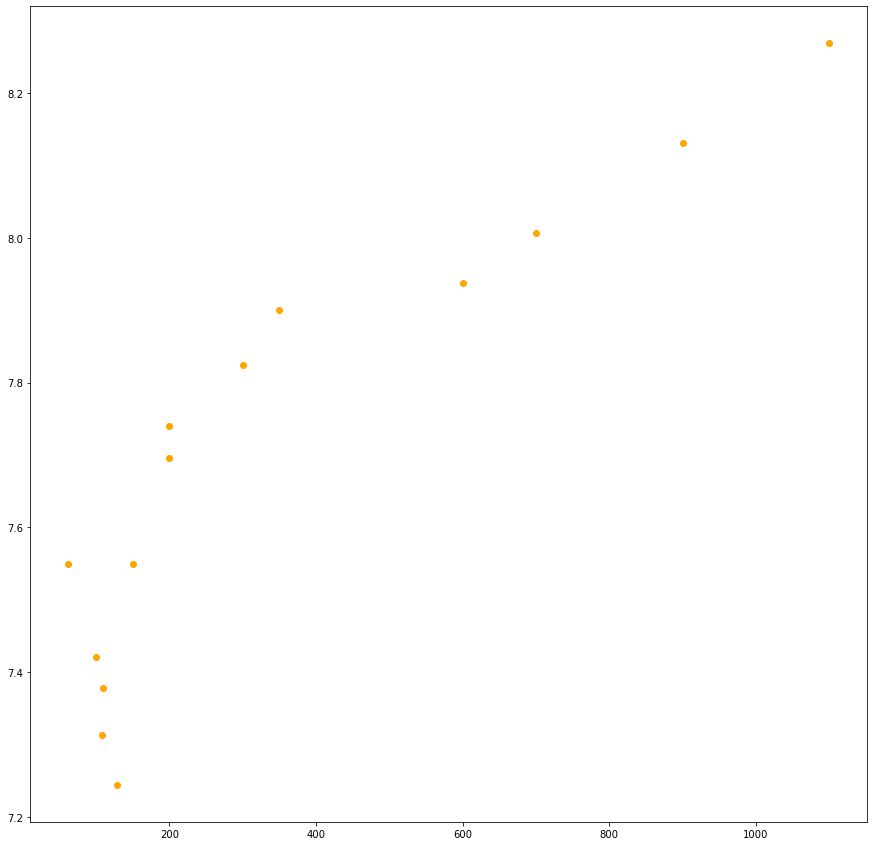

In [25]:
plt.scatter(x=data['Weight_gained'], y = np.log(data['Calories_consumed']), color='orange')
np.corrcoef(data['Weight_gained'], np.log(data['Calories_consumed']))

In [26]:
model3 = smf.ols('np.log(Calories_consumed) ~ Weight_gained', data=data).fit()
model3.summary()

C:\Users\jaich\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     np.log(Calories_consumed)   R-squared:                       0.808
Model:                                   OLS   Adj. R-squared:                  0.792
Method:                        Least Squares   F-statistic:                     50.40
Date:                       Fri, 17 Sep 2021   Prob (F-statistic):           1.25e-05
Time:                               14:10:13   Log-Likelihood:                 8.3130
No. Observations:                         14   AIC:                            -12.63
Df Residuals:                             12   BIC:                            -11.35
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.4068      0.058    128.367      0.000       7.281       7.533
Weight_gained     0.0009      0.000      7.100      0.000       0.001       0.001
==============================================================================
Omnibus:                        0.488   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.783   Jarque-Bera (JB):                0.559
Skew:                          -0.317   Prob(JB):                        0.756
Kurtosis:                       2.254   Cond. No.                         719.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
pred3 = model3.predict(pd.DataFrame(data['Weight_gained']))
pred3_at = np.exp(pred3)
pred3_at

0     1805.909334
1     1953.101471
2     3545.194617
3     1953.101471
4     2126.731695
5     1808.988061
6     1836.933870
7     1736.526880
8     2745.847366
9     4203.546672
10    1793.646733
11    1871.676808
12    2219.252162
13    2989.952498
dtype: float64

Regression Line

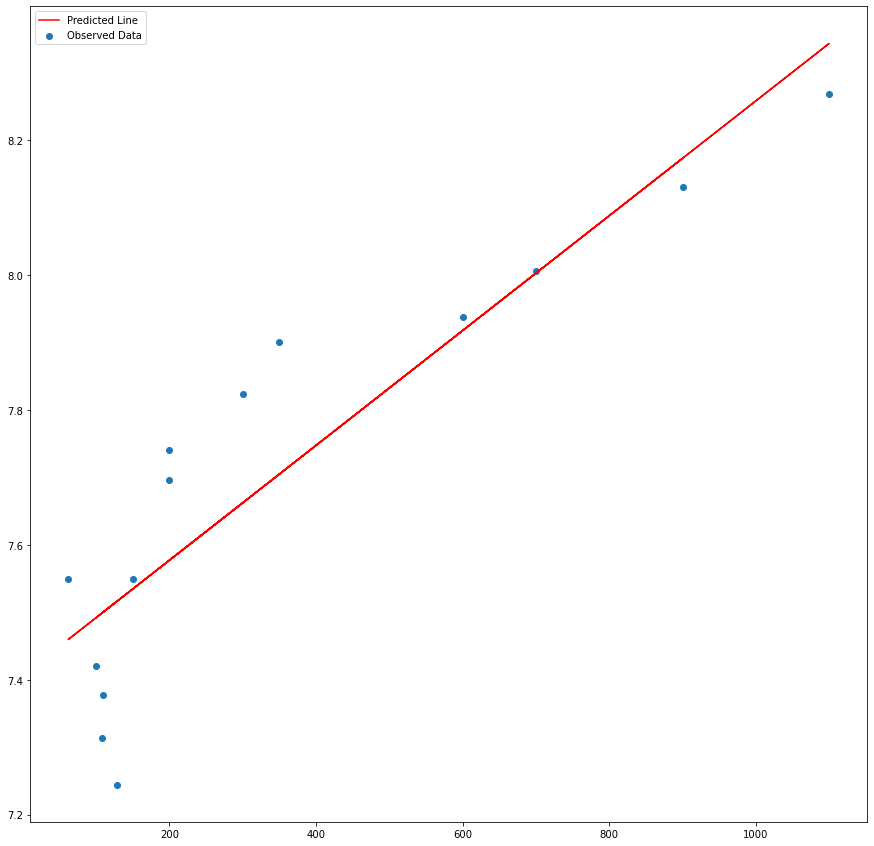

In [32]:
plt.scatter(data['Weight_gained'],np.log(data['Calories_consumed']))
plt.plot(data['Weight_gained'], pred3, "r")
plt.legend(['Predicted Line', 'Observed Data'])
plt.show()

Other way of showing

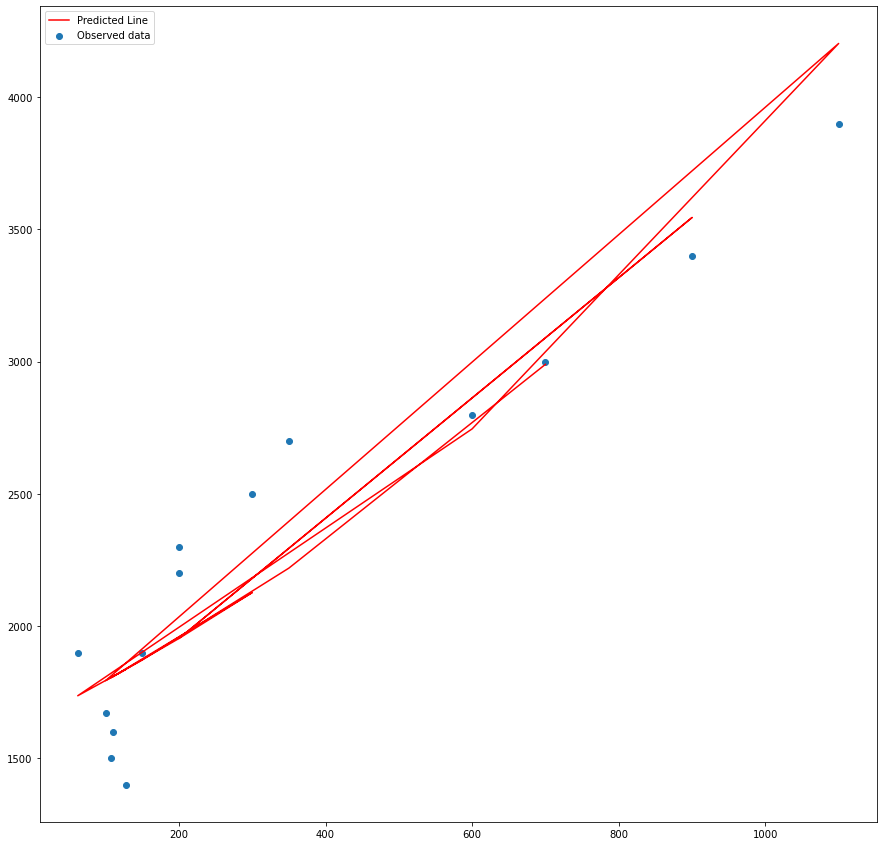

In [33]:
plt.scatter(data['Weight_gained'], data['Calories_consumed'])
plt.plot(data['Weight_gained'], pred3_at, "r")
plt.legend(['Predicted Line', 'Observed data'])
plt.show()

In [34]:
# Error Calculation
res3 = data['Calories_consumed'] - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

272.4207117048494

#### Polynomial Transformation #####

x = Weight_gained, x^2 = Weight_gained * Weight_gained, y = log(Calories_consumed)

In [35]:
model4 = smf.ols('np.log(Calories_consumed) ~ Weight_gained + I(Weight_gained * Weight_gained)',data=data).fit()
model4.summary()

C:\Users\jaich\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     np.log(Calories_consumed)   R-squared:                       0.852
Model:                                   OLS   Adj. R-squared:                  0.825
Method:                        Least Squares   F-statistic:                     31.55
Date:                       Fri, 17 Sep 2021   Prob (F-statistic):           2.78e-05
Time:                               14:22:28   Log-Likelihood:                 10.125
No. Observations:                         14   AIC:                            -14.25
Df Residuals:                             11   BIC:                            -12.33
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            7.2892      0.084     86.724      0.000       7.104       7.474
Weight_gained                        0.0017      0.000      3.560      0.004       0.001       0.003
I(Weight_gained * Weight_gained) -7.689e-07   4.27e-07     -1.803      0.099   -1.71e-06     1.7e-07
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   2.647
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.721
Skew:                          -0.394   Prob(JB):                        0.697
Kurtosis:                       2.217   Cond. No.                     1.01e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
pred4 = model4.predict(pd.DataFrame(data['Weight_gained']))
pred4_at = np.exp(pred4)
pred4_at

0     1739.606122
1     1986.232241
2     3556.374964
3     1986.232241
4     2260.501362
5     1744.868700
6     1792.457905
7     1620.099409
8     3038.496984
9     3657.476403
10    1718.608337
11    1851.135743
12    2397.660886
13    3251.772007
dtype: float64

In [37]:
# Regression Line
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = data.iloc[:, 0:1].values
X_poly = poly_reg.fit_transform(X)
y = data.iloc[:,1].values

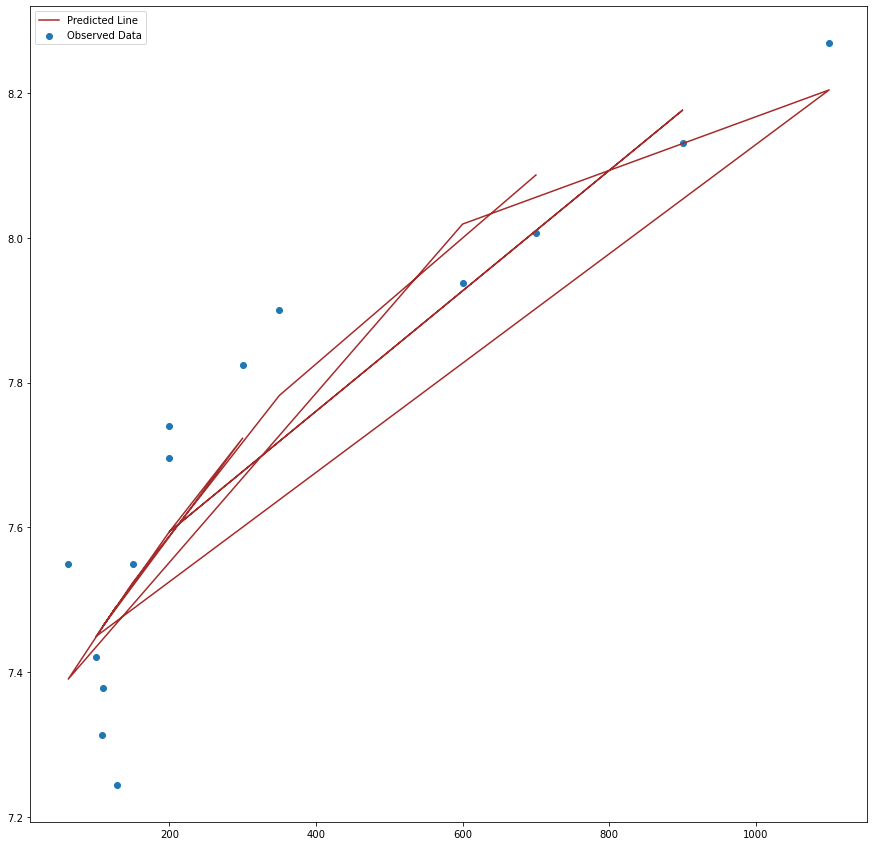

In [42]:
plt.scatter(data['Weight_gained'], np.log(data['Calories_consumed']))
plt.plot(X,pred4, color = 'brown')
plt.legend(['Predicted Line', 'Observed Data'])
plt.show()

In [43]:
# Error Calculation

res4 = data['Calories_consumed'] - pred4
res_sqrt4 = res4 * res4
mse4 = np.mean(res_sqrt4)
rmse4 = np.sqrt(mse4)
rmse4

2442.904058651332

In [45]:
# Choose the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE
0,SLR,232.833501
1,Log model,253.558040
2,Exp model,272.420712
3,Poly model,2442.904059


### The best model is with SLR model which has the least RMSE score of 232.833501

from sklearn.model_selection import train_test_split

data = pd.read_csv('calories_consumed.csv')
data = data.rename(columns = {'Weight gained (grams)':'Weight_gained', 'Calories Consumed':'Calories_consumed'})
train, test = train_test_split(data, test_size = 0.3)


final_model = smf.ols('Calories_consumed ~ Weight_gained', data=data).fit()
final_model.summary()

# Predict on test data
test_pred = final_model.predict(pd.DataFrame(test))
test_pred

test_res = data['Calories_consumed'] - test_pred
test_res = test_res * test_res
mse = np.mean(test_res)
rmse = np.sqrt(mse)
rmse